Loading required package: lattice

Loading required package: deSolve



y0        y0_lm        mumax          lag 
 0.158000000  0.164444184  0.004685832 -8.531286426

r2 
0.9821488

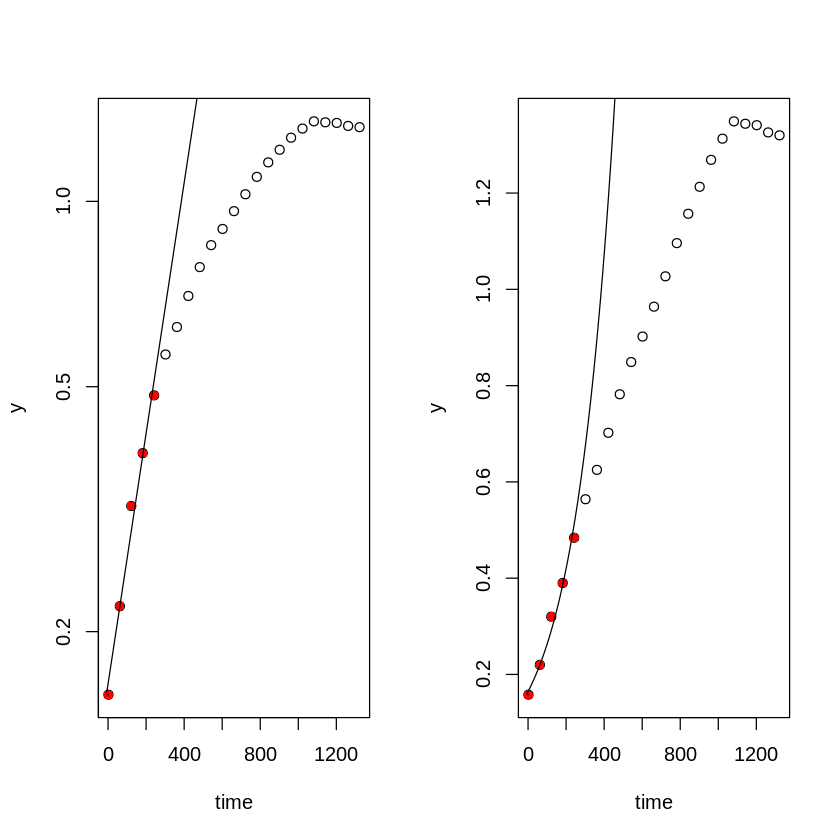

In [1]:
#install.packages('IRkernel')
#IRkernel::installspec()  # to register the kernel in the current R installation
#install.packages("growthrates")
library(growthrates)


In [20]:
mgamrcm<-read.table("FECALIBACTERIUM PRAUSNITZII_mGAM_rcm", header = T)
time_temp<-read.table("time_temp", header=T)
library(lubridate)
time<-as.numeric(lubridate::as.difftime(as.character(time_temp[,1])))
temp<-as.numeric(time_temp[,2])
rcm<-cbind(time,mgamrcm[,1:3])
mgam<-cbind(time,mgamrcm[,4:6])
head(rcm)
head(mgam)

,time,rcm1,rcm2,rcm3
,<dbl>,<dbl>,<dbl>,<dbl>
1,2.066667,0.135,0.158,0.154
2,62.066667,0.176,0.220,0.219
3,122.066667,0.262,0.320,0.281
4,182.066667,0.321,0.390,0.375
5,242.066667,0.400,0.484,0.471
6,302.066667,0.488,0.564,0.579


,time,mgam1,mgam2,mgam3
,<dbl>,<dbl>,<dbl>,<dbl>
1,2.066667,0.075,0.068,0.054
2,62.066667,0.094,0.091,0.072
3,122.066667,0.126,0.127,0.097
4,182.066667,0.152,0.157,0.115
5,242.066667,0.170,0.177,0.133
6,302.066667,0.203,0.212,0.180


In [3]:
library(ggplot2)
library(reshape2)
ggplot2::theme_set(theme_classic())
rcm_high <- melt(rcm, id.vars="time")
head(rcm_high)

,time,variable,value
,<dbl>,<fct>,<dbl>
1,2.066667,rcm1,0.135
2,62.066667,rcm1,0.176
3,122.066667,rcm1,0.262
4,182.066667,rcm1,0.321
5,242.066667,rcm1,0.400
6,302.066667,rcm1,0.488


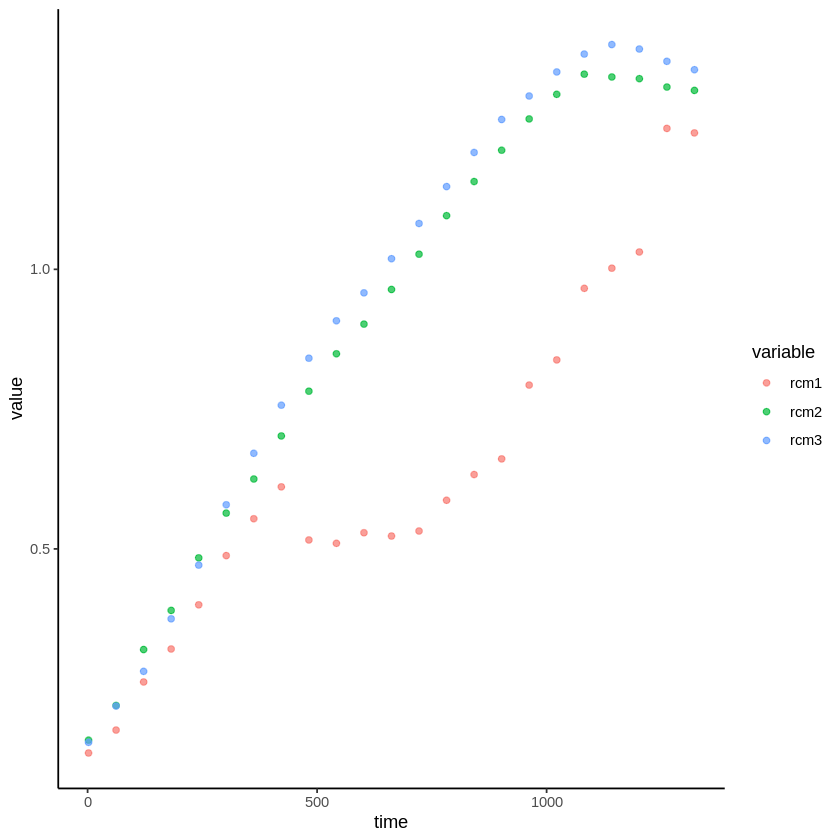

In [4]:
ggrcm<-ggplot(rcm_high, aes(x = time, y = value, col=variable)) + geom_point(alpha=0.7)
ggrcm

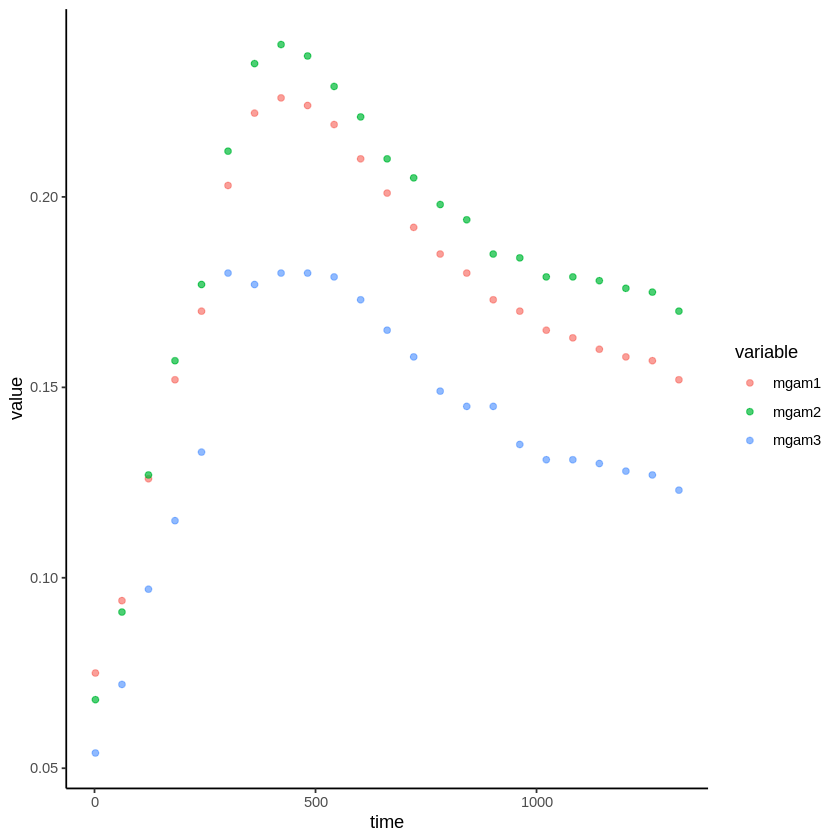

In [5]:
mgam_high <- melt(mgam, id.vars="time")
ggrcm<-ggplot(mgam_high, aes(x = time, y = value, col=variable)) + geom_point(alpha=0.7)
ggrcm

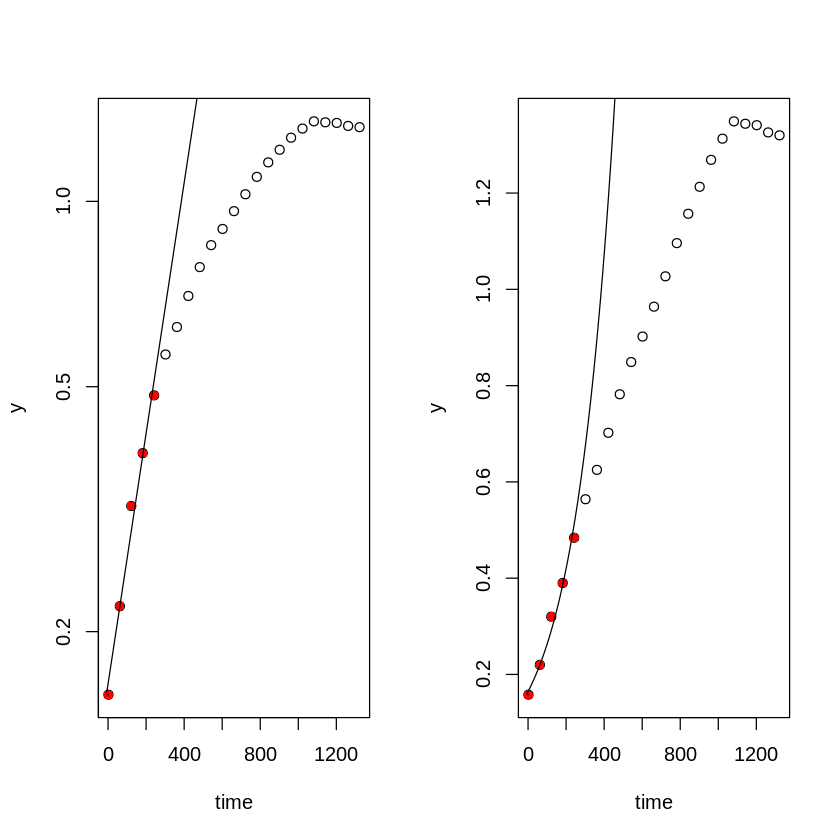

In [14]:
fit <- fit_easylinear(rcm$time, rcm$rcm2)
par(mfrow = c(1, 2))
plot(fit, log = "y")
plot(fit)

In [7]:
coef(fit)      # exponential growth parameters

y0        y0_lm        mumax          lag 
 0.158000000  0.164444184  0.004685832 -8.531286426

r2 
0.9821488

In [13]:
mumax<-coef(fit)[3]
rsquared(fit)
mumax  

r2 
0.9821488

mumax 
0.004685832